In [1]:
import requests
import pandas as pd

full_list = pd.read_csv('final_4.2k.csv')

In [2]:
res = {}
res_status = {}
for url in full_list['unique_urls']:
    try:
        result = requests.get('http://' + url, timeout=10)
        res[url] = result
        res_status[url] = result.status_code
        print(url, result.status_code)
    except Exception as e:
        res_status[url] = 'exception'
        res[url] = e
        print(url, e)

12minutos.com 200
16wmpo.com 200
20minutenews.com 404
247newsmedia.com 200
24aktuelles.com 200
24online.news 200
24usainfo.com HTTPConnectionPool(host='24usainfo.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb8af116580>: Failed to establish a new connection: [Errno -2] Name or service not known'))
24wpn.com 200
abcnews.com.co 200
actualite.co 200
actualites.co 200
adobochronicles.com 200
alabamaobserver.com 200
aldipest.com 200
alertchild.com 200
alynews.com 200
americafans.com 403
americanflare.com 200
americanflavor.news 200
americanjournalreview.com 200
americanpeoplenetwork.com 200
americanpoliticnews.co 200
americanpresident.co 200
americanprides.com 200
americasnewest.com ('Connection aborted.', BadStatusLine('HTTP/1.1 401.2 Unauthorized\r\n'))
amposts.com 200
anews-24.com 200
anews24.org 200
angrypatriotmovement.com 404
anonjekloy.tk HTTPConnectionPool(host='anonjekloy.tk', port=80): Max retries e

In [3]:
results = pd.DataFrame(res_status.items(), columns=['url', 'response_code'])
results.to_csv('response_codes.csv', index=False)

In [37]:
attrs = pd.read_csv('final_4.2k_attrs.csv')
results_attr = pd.merge(attrs, results, on='url', how='inner')

results_attr['10k'] = 1
results_attr['response_success'] = 1

for row, backlinks in enumerate(results_attr['backlinks']):
    if backlinks >= 10000:
        results_attr['10k'][row] = 1
    else:
        results_attr['10k'][row] = 0

for row, label in enumerate(results_attr['label']):
    if label >= 5:
        results_attr['label'][row] = 1
    else:
        results_attr['label'][row] = 0

for row, response_code in enumerate(results_attr['response_code']):
    if response_code != 'exception' and int(response_code) != 404:
        results_attr['response_success'][row] = 1
    else:
        results_attr['response_success'][row] = 0

results_attr.corr()['10k']

/tmp/ipykernel_12281/2134358265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_attr['10k'][row] = 1
/tmp/ipykernel_12281/2134358265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_attr['10k'][row] = 0
/tmp/ipykernel_12281/2134358265.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_attr['label'][row] = 0
/tmp/ipykernel_12281/2134358265.py:15: SettingWithCopyWarning: 
A value is trying to be set on a

label                  0.471904
backlinks              0.019220
refpages               0.017953
pages                  0.162057
valid_pages            0.162078
text                   0.019128
image                  0.018904
nofollow               0.019115
ugc                    0.016625
sponsored              0.022251
dofollow               0.019113
redirect               0.018668
canonical              0.076423
gov                    0.018013
edu                    0.018484
rss                    0.026982
alternate              0.025414
html_pages             0.126993
links_internal         0.113105
links_external         0.098164
refdomains             0.030554
refclass_c             0.174287
refips                 0.066461
linked_root_domains    0.168583
10k                    1.000000
response_success       0.258962
Name: 10k, dtype: float64

In [38]:
results_attr.groupby('source')[['10k','response_success']].corr().iloc[0::2,-1]

source        
Blacklist  10k    0.144820
Buzzfeed   10k    0.234051
MBFC       10k    0.070646
MBFC-Q     10k    0.141927
Politico   10k    0.278514
Snopes     10k    0.157378
Name: response_success, dtype: float64

In [39]:
results_attr[results_attr['response_success'] == 1][['source', 'response_success']].groupby('source').describe()

response_success                                   
                     count mean  std  min  25%  50%  75%  max
source                                                       
Blacklist            264.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Buzzfeed              38.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
MBFC                3121.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
MBFC-Q               384.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Politico              54.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Snopes                44.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [30]:
results_attr[results_attr['10k'] == 1][['source', '10k']].groupby('source').describe()

10k                                   
            count mean  std  min  25%  50%  75%  max
source                                              
Blacklist    38.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Buzzfeed      6.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
MBFC       2817.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
MBFC-Q      297.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Politico     15.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Snopes       38.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [40]:
results_attr.groupby('response_success').describe()

label                                               \
                   count      mean       std  min  25%  50%  75%  max   
response_success                                                        
0                  300.0  0.230000  0.421536  0.0  0.0  0.0  0.0  1.0   
1                 3905.0  0.522407  0.499562  0.0  0.0  1.0  1.0  1.0   

                 backlinks                ... linked_root_domains            \
                     count          mean  ...                 75%       max   
response_success                          ...                                 
0                    300.0  2.917872e+06  ...               339.0  428856.0   
1                   3905.0  1.146348e+08  ...              8394.0  973037.0   

                     10k                                               
                   count      mean       std  min  25%  50%  75%  max  
response_success                                                       
0                  300.0  0.366667  0.482700  0.0  0.0  0.0  1.0  1.0  
1                 3905.0  0.794110  0.404402  0.0  1.0  1.0  1.0  1.0  

[2 rows x 200 columns]

In [45]:
url_404s = set(results_attr[results_attr['response_success'] == 0]['url'].to_numpy())
url_10ks = set(results_attr[results_attr['10k'] == 0]['url'].to_numpy())

url_overlap = url_10ks.intersection(url_404s)
len(url_overlap) / len(url_404s)

0.6333333333333333

array([<AxesSubplot:title={'center':'response_code'}>], dtype=object)

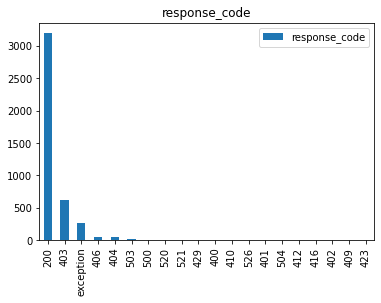

In [18]:
hist_pd = results_attr[['response_code']]#, 'response_success', '10k']]
hist_pd.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [19]:
results_attr.groupby('10k').describe()

label                                              backlinks  \
      count      mean       std  min  25%  50%  75%  max     count   
10k                                                                  
0     994.0  0.077465  0.267462  0.0  0.0  0.0  0.0  1.0     994.0   
1    3211.0  0.632825  0.482110  0.0  0.0  1.0  1.0  1.0    3211.0   

                   ... linked_root_domains           response_success  \
             mean  ...                 75%       max            count   
10k                ...                                                  
0    1.361927e+03  ...                16.0  428856.0            994.0   
1    1.395253e+08  ...             11573.5  973037.0           3211.0   

                                                  
         mean       std  min  25%  50%  75%  max  
10k                                               
0    0.473843  0.499567  0.0  0.0  0.0  1.0  1.0  
1    0.849891  0.357234  0.0  1.0  1.0  1.0  1.0  

[2 rows x 200 columns]

In [20]:
results_attr.groupby('response_success').describe()

label                                               \
                   count      mean       std  min  25%  50%  75%  max   
response_success                                                        
0                 1005.0  0.277612  0.448044  0.0  0.0  0.0  1.0  1.0   
1                 3200.0  0.571875  0.494884  0.0  0.0  1.0  1.0  1.0   

                 backlinks                ... linked_root_domains            \
                     count          mean  ...                 75%       max   
response_success                          ...                                 
0                   1005.0  2.465051e+06  ...              1256.0  719115.0   
1                   3200.0  1.392312e+08  ...             10171.0  973037.0   

                     10k                                               
                   count      mean       std  min  25%  50%  75%  max  
response_success                                                       
0                 1005.0  0.479602  0.499832  0.0  0.0  0.0  1.0  1.0  
1                 3200.0  0.852812  0.354348  0.0  1.0  1.0  1.0  1.0  

[2 rows x 200 columns]